In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import geopandas as gpd

In [2]:
# importing the county cases mask data
data_mask = pd.read_csv('/Users/rahulparab/dsi/08-week/COVID-19-vaccinations/clean_data/cases_with_mask_use.csv')

In [3]:
# importing the hospital by county data
data_hosp = pd.read_csv('/Users/rahulparab/dsi/08-week/COVID-19-vaccinations/clean_data/hospitals_by_county.csv')

In [4]:
data_mask.head()

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
0,Santa Clara,151.0,6.0,151,6,2020-03-18,0.015,0.014,0.04,0.168,0.764,1927852
1,Santa Clara,183.0,8.0,32,2,2020-03-19,0.015,0.014,0.04,0.168,0.764,1927852
2,Santa Clara,246.0,8.0,63,0,2020-03-20,0.015,0.014,0.04,0.168,0.764,1927852
3,Santa Clara,269.0,10.0,23,2,2020-03-21,0.015,0.014,0.04,0.168,0.764,1927852
4,Santa Clara,284.0,13.0,15,3,2020-03-22,0.015,0.014,0.04,0.168,0.764,1927852


In [5]:
data_county_pop = data_mask[['county', 'date' , 'population']]

In [61]:
data_county_pop['population'].describe()

count    1.748600e+04
mean     6.824013e+05
std      1.456244e+06
min      1.129000e+03
25%      4.590500e+04
50%      1.928430e+05
75%      7.621480e+05
max      1.003911e+07
Name: population, dtype: float64

In [6]:
# merge the hospital county and county population data together.

In [7]:
data_hosp

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Kings,2020-03-29,2.0,5.0,7.0,292.0,1.0,0.0,2.0
1,Yolo,2020-03-29,2.0,3.0,5.0,251.0,1.0,1.0,0.0
2,San Diego,2020-03-29,121.0,211.0,332.0,4459.0,77.0,39.0,205.0
3,Modoc,2020-03-29,0.0,0.0,0.0,11.0,0.0,0.0,0.0
4,Mono,2020-03-29,0.0,1.0,1.0,292.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
16288,Contra Costa,2021-01-13,250.0,10.0,260.0,1600.0,61.0,1.0,40.0
16289,Placer,2021-01-13,165.0,12.0,177.0,754.0,28.0,2.0,8.0
16290,San Luis Obispo,2021-01-13,57.0,2.0,59.0,460.0,7.0,0.0,16.0
16291,Yuba,2021-01-13,53.0,0.0,53.0,261.0,15.0,0.0,0.0


In [8]:
# lets rename column name for todays_date

data_hosp.rename(columns = {'todays_date':'date'},inplace = True)

In [9]:
data_hosp

,county,date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Kings,2020-03-29,2.0,5.0,7.0,292.0,1.0,0.0,2.0
1,Yolo,2020-03-29,2.0,3.0,5.0,251.0,1.0,1.0,0.0
2,San Diego,2020-03-29,121.0,211.0,332.0,4459.0,77.0,39.0,205.0
3,Modoc,2020-03-29,0.0,0.0,0.0,11.0,0.0,0.0,0.0
4,Mono,2020-03-29,0.0,1.0,1.0,292.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
16288,Contra Costa,2021-01-13,250.0,10.0,260.0,1600.0,61.0,1.0,40.0
16289,Placer,2021-01-13,165.0,12.0,177.0,754.0,28.0,2.0,8.0
16290,San Luis Obispo,2021-01-13,57.0,2.0,59.0,460.0,7.0,0.0,16.0
16291,Yuba,2021-01-13,53.0,0.0,53.0,261.0,15.0,0.0,0.0


In [10]:
# Merge DataFrames
df= pd.merge(data_hosp, data_county_pop , on = [ 'county' , 'date'], how = 'left')


In [48]:
df.isna().sum()

county                                   0
date                                     0
hospitalized_covid_confirmed_patients    0
hospitalized_suspected_covid_patients    0
hospitalized_covid_patients              0
all_hospital_beds                        0
icu_covid_confirmed_patients             0
icu_suspected_covid_patients             0
icu_available_beds                       0
population                               0
dtype: int64

In [12]:
df.fillna('0', inplace = True)

In [13]:
df

,county,date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,population
0,Kings,2020-03-29,2.0,5.0,7.0,292.0,1.0,0.0,2.0,152940
1,Yolo,2020-03-29,2.0,3.0,5.0,251.0,1.0,1.0,0.0,220500
2,San Diego,2020-03-29,121.0,211.0,332.0,4459.0,77.0,39.0,205.0,3.33833e+06
3,Modoc,2020-03-29,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0
4,Mono,2020-03-29,0.0,1.0,1.0,292.0,0.0,0.0,2.0,14444
...,...,...,...,...,...,...,...,...,...,...
16288,Contra Costa,2021-01-13,250.0,10.0,260.0,1600.0,61.0,1.0,40.0,1.15353e+06
16289,Placer,2021-01-13,165.0,12.0,177.0,754.0,28.0,2.0,8.0,398329
16290,San Luis Obispo,2021-01-13,57.0,2.0,59.0,460.0,7.0,0.0,16.0,283111
16291,Yuba,2021-01-13,53.0,0.0,53.0,261.0,15.0,0.0,0.0,78668


In [14]:
df_raw = df[['county','date','hospitalized_covid_patients','population']]

In [15]:
df_raw

,county,date,hospitalized_covid_patients,population
0,Kings,2020-03-29,7.0,152940
1,Yolo,2020-03-29,5.0,220500
2,San Diego,2020-03-29,332.0,3.33833e+06
3,Modoc,2020-03-29,0.0,0
4,Mono,2020-03-29,1.0,14444
...,...,...,...,...
16288,Contra Costa,2021-01-13,260.0,1.15353e+06
16289,Placer,2021-01-13,177.0,398329
16290,San Luis Obispo,2021-01-13,59.0,283111
16291,Yuba,2021-01-13,53.0,78668


In [16]:
df_raw.groupby(by = ['county','date'])['hospitalized_covid_patients'].sum()

county   date      
Alameda  2020-03-29    127.0
         2020-03-30    148.0
         2020-03-31    150.0
         2020-04-01    128.0
         2020-04-02    133.0
                       ...  
Yuba     2021-01-09     56.0
         2021-01-10     56.0
         2021-01-11     54.0
         2021-01-12     55.0
         2021-01-13     53.0
Name: hospitalized_covid_patients, Length: 16293, dtype: float64

#### Using Geopandas for plotting

In [17]:
df_raw.to_csv('/Users/rahulparab/dsi/08-week/COVID-19-vaccinations/clean_data/hospitals_by_county_with_pop.csv', index=False)

In [27]:
# set the filepath and load in a shapefile
map_df = gpd.read_file('/Users/rahulparab/dsi/08-week/COVID-19-vaccinations/data/CA_Counties/CA_Counties_TIGER2016.shp')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


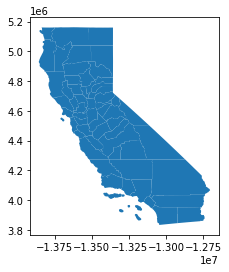

In [28]:
map_df.plot();

In [29]:
df_raw.columns

Index(['county', 'date', 'hospitalized_covid_patients', 'population'], dtype='object')

In [30]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('NAME').join(df_raw.set_index('county'))
merged.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,date,hospitalized_covid_patients,population
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,36084,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-03-29,127.0,1.67133e+06
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,36084,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-03-30,148.0,1.67133e+06
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,36084,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-03-31,150.0,1.67133e+06
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,36084,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-04-01,128.0,1.67133e+06
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,36084,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-04-02,133.0,1.67133e+06


In [58]:
merged

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,date,hospitalized_covid_patients,population,percent_covid_pop
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,...,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-03-29,127.0,1.67133e+06,0.007599
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,...,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-03-30,148.0,1.67133e+06,0.008855
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,...,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-03-31,150.0,1.67133e+06,0.008975
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,...,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-04-01,128.0,1.67133e+06,0.007659
Alameda,06,001,01675839,06001,Alameda County,06,H1,G4020,488,41860,...,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",2020-04-02,133.0,1.67133e+06,0.007958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yuba,06,115,00277322,06115,Yuba County,06,H1,G4020,472,49700,...,A,1636971148,31000614,+39.2662469,-121.3407809,"POLYGON ((-13536192.850 4739993.980, -13536207...",2021-01-09,56.0,78668,0.071185
Yuba,06,115,00277322,06115,Yuba County,06,H1,G4020,472,49700,...,A,1636971148,31000614,+39.2662469,-121.3407809,"POLYGON ((-13536192.850 4739993.980, -13536207...",2021-01-10,56.0,78668,0.071185
Yuba,06,115,00277322,06115,Yuba County,06,H1,G4020,472,49700,...,A,1636971148,31000614,+39.2662469,-121.3407809,"POLYGON ((-13536192.850 4739993.980, -13536207...",2021-01-11,54.0,78668,0.068643
Yuba,06,115,00277322,06115,Yuba County,06,H1,G4020,472,49700,...,A,1636971148,31000614,+39.2662469,-121.3407809,"POLYGON ((-13536192.850 4739993.980, -13536207...",2021-01-12,55.0,78668,0.069914


In [34]:
merged['percent_covid_pop'] = (merged['hospitalized_covid_patients'] )*100 /  (pd.to_numeric(merged['population'], downcast="float"))

<AxesSubplot:ylabel='percent_covid_pop'>

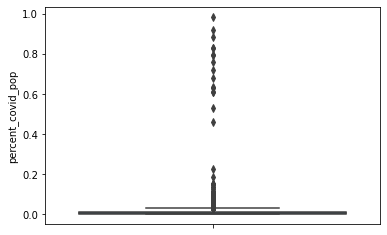

In [46]:
sns.boxplot( y=merged["percent_covid_pop"] )

In [52]:
merged["percent_covid_pop"].describe()

count     16293.0
unique       57.0
top       12285.0
freq        291.0
Name: population, dtype: float64

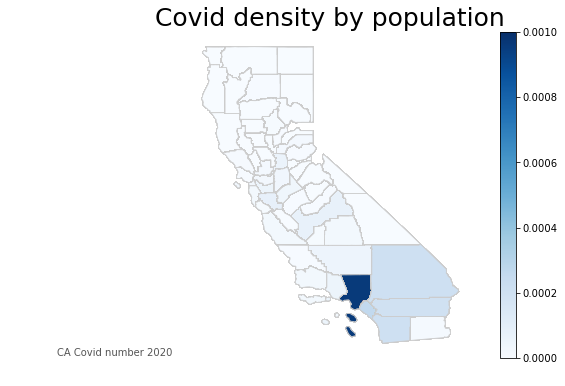

In [45]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'hospitalized_covid_patients'

# set the range for the choropleth
vmin, vmax = 0.00 , 0.000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Covid density by population', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('CA Covid number 2020',
           xy=(0.1, 0.1), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=500)